## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [1]:
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
N=1310720
df=pd.read_csv('~/Scrivania/data/data_000637.txt', nrows=N)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Find out the number of BX in a ORBIT (the value 'x').

Studying the maximum value of TDC_means and BX_counter we expect that 


30 TDC_MEANS makes 1 BX_COUNTER


3564 BX_COUNTER makes 1 ORBIT_CNT

In [3]:
BX_to_TDC=30
ORBIT_to_BX=3564
TDC_to_ns=25/30
ORBIT_to_ns=ORBIT_to_BX*BX_to_TDC*TDC_to_ns
BX_to_ns=BX_to_TDC*TDC_to_ns

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
df['TIME']=(df['ORBIT_CNT']*ORBIT_to_ns+df['BX_COUNTER']*BX_to_ns+df['TDC_MEAS']*TDC_to_ns)
df
Min=df['TIME'].min()
Max=df['TIME'].max()
duration=Max-Min
print(duration)

980416253.3125


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

Done in point 3

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
df['HEAD']=np.random.randint(0,2, size=N)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,0,0,123,3869200167,2374,26,3.447457e+14
1,0,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,0,0,139,3869211171,769,0,3.447467e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [8]:
df2=df[df['HEAD']==1]
df2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
3,1,0,64,3869200167,2558,19,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
7,1,0,139,3869200167,2776,0,3.447457e+14
8,1,0,62,3869200167,2774,21,3.447457e+14
9,1,0,60,3869200167,2788,7,3.447457e+14
...,...,...,...,...,...,...,...
1310712,1,1,35,3869211171,429,4,3.447467e+14
1310713,1,0,64,3869211171,758,18,3.447467e+14
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

In [19]:
dfFPGA1=df[df['FPGA']==1]
dfFPGA0=df[df['FPGA']==0]

<AxesSubplot:>

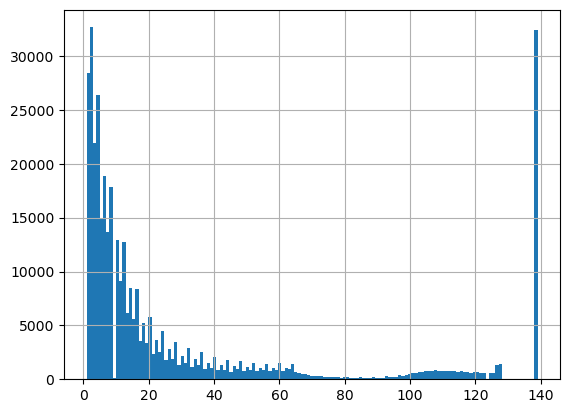

In [23]:
import matplotlib as plt

dfFPGA1['TDC_CHANNEL'].hist(bins=139)

<AxesSubplot:>

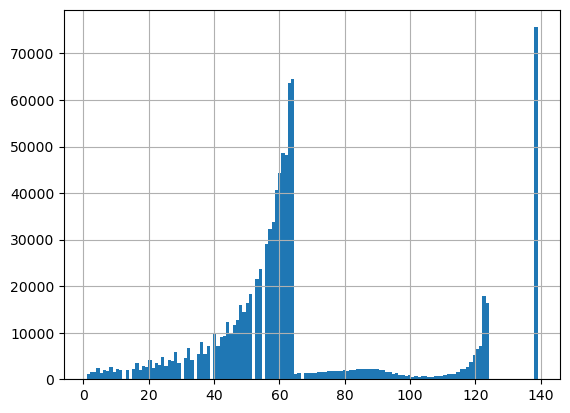

In [25]:
dfFPGA0['TDC_CHANNEL'].hist(bins=139)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [32]:
dfFPGA1.groupby('TDC_CHANNEL').size().sort_values()[-3:]

TDC_CHANNEL
1      28438
139    32442
2      32669
dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [35]:
len(df['ORBIT_CNT'].value_counts())

11001

In [38]:
len((df[df['TDC_CHANNEL']==139]['ORBIT_CNT']).value_counts())

10976